In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Necessary to import pypwaves_updated.py from parent directory
import sys
sys.path.append('../')
import pypwaves_updated as pw

In [ ]:
# Load data - Choose one

#Dublin data
#pls_file_dublin = "../../Data/dublin_sample/F_150326_125917.pls"
#pulsewave = pw.openPLS(pls_file_dublin)

#Brooklyn data
pls_file_laptop = "../../Data/172201/10552_NYU_M2_Pulse_Waves_MTA_Resolved - Scanner 1 - 190511_172201_1 - originalpoints.pls"
pulsewave = pw.openPLS(pls_file_laptop)

#pls_file_linux = "../../Data/200348_pls/10552_NYU_M3_Pulse_Waves_MTA_Resolved - Scanner 1 - 190511_200348_1 - originalpoints.pls"
#pulsewave = pw.openPLS(pls_file_linux)
# pickle_name = "dublin_anchors_125917.pkl"

### Looking at anchor points
I'm trying to determine whether or not anchor points indicate the location of the emitter when the pulse is sent/received, or is an arbitrary point.

In [2]:
def pull_pulses(pulsewave,pulse_count=None):
    '''this function extracts full pulse records into a dataframe'''
    pass

def pull_anchors(pulsewave,pulse_count=None):
    '''this function collects the x,y, and z anchors for each point in the pulsewave object.'''
    # Extract all the anchor points in each dimension
    if pulse_count == None:
        x_anchors = [pulsewave.get_pulse(i).x_anchor for i in range(pulsewave.num_pulses)]
        y_anchors = [pulsewave.get_pulse(i).y_anchor for i in range(pulsewave.num_pulses)]
        z_anchors = [pulsewave.get_pulse(i).z_anchor for i in range(pulsewave.num_pulses)]
        gps_time = [pulsewave.get_pulse(i).gps_timestamp for i in range(pulsewave.num_pulses)]
    else:
        x_anchors = [pulsewave.get_pulse(i).x_anchor for i in range(1000,pulse_count+1000)]
        y_anchors = [pulsewave.get_pulse(i).y_anchor for i in range(1000,pulse_count+1000)]
        z_anchors = [pulsewave.get_pulse(i).z_anchor for i in range(1000,pulse_count+1000)]
        gps_time = [pulsewave.get_pulse(i).gps_timestamp for i in range(1000,pulse_count+1000)]

    # Create numpy array and pandas DF for easier manipulation
    anchor_arr = np.array([gps_time,x_anchors,y_anchors,z_anchors])
    anchor_df = pd.DataFrame(anchor_arr.T,columns=['gps_time','x','y','z'])
    return anchor_df

def denoise(df,low_quantile,high_quantile):
    '''takes the output of pull_anchors function, removes the outliers based on quantiles.'''
    quantile_10 = df.quantile(low_quantile)
    quantile_90 = df.quantile(high_quantile)
    df_denoised = df[df['x']>=quantile_10['x']]
    df_denoised = df_denoised[df_denoised['y']>=quantile_10['y']]
    df_denoised = df_denoised[df_denoised['z']>=quantile_10['z']]
    df_denoised = df_denoised[df_denoised['x']<=quantile_90['x']]
    df_denoised = df_denoised[df_denoised['y']<=quantile_90['y']]
    df_denoised = df_denoised[df_denoised['z']<=quantile_90['z']]
    return df_denoised

In [3]:
# anchor_df = pull_anchors(pulsewave)
# anchor_df.to_pickle(pickle_name)
pickle_name = "anchors_200348.pkl"
anchor_df = pd.read_pickle("../../Data/pickles/"+pickle_name)
anchor_df.sort_values(by=['gps_time'],inplace=True)

In [4]:
# I'm comparing the min and max to the 0.1 and 0.9 quantiles...
anchor_df.shape

(11408187, 4)

In [ ]:
# Do all pulses have a return?  Looking into it...
first_returns = [pulsewave.get_pulse(i).first_return for i in range(1000,3000)]
last_returns = [pulsewave.get_pulse(i).last_return for i in range(1000,3000)]

## Dublin Data

In [ ]:
# Extract all the timestamps
# gps_time = [pulsewave.get_pulse(i).gps_timestamp for i in range(300000,500000)]
# x_anchor = [pulsewave.get_pulse(i).x_anchor for i in range(300000,500000)]
# y_anchor = [pulsewave.get_pulse(i).y_anchor for i in range(300000,500000)]
# z_anchor = [pulsewave.get_pulse(i).z_anchor for i in range(300000,500000)]

# gps_arr = np.array([gps_time,x_anchor,y_anchor,z_anchor])
# gps_df = pd.DataFrame(gps_arr.T,columns=['gps_time','x_anchor','y_anchor','z_anchor'])
#gps_df.to_pickle("gps_time_164239.pkl")

# # Sort dataframe by gps_time
# gps_sorted = gps_df.sort_values(by=['gps_time'])

# # Plot GPS Time, X,Y,Z anchor coordinates for a portion of the file
# plt.figure(figsize=(20,20))
# plt.subplot(4, 1, 1)
# plt.plot(range(200000),gps_sorted['gps_time'])
# plt.ylabel("GPS Time")
# plt.title("Dublin sample run")

# plt.subplot(4, 1, 2)
# plt.plot(gps_sorted['gps_time'],gps_sorted['x_anchor'])
# plt.ylabel("X Anchor")

# plt.subplot(4, 1, 3)
# plt.plot(gps_sorted['gps_time'],gps_sorted['y_anchor'])
# plt.ylabel("Y Anchor")
# plt.xlabel("Pulse Record")

# plt.subplot(4, 1, 4)
# plt.plot(gps_sorted['gps_time'],gps_sorted['z_anchor'])
# plt.ylabel("Z Anchor")
# plt.xlabel("Pulse Record")

## Brooklyn Data

In [ ]:
#anchors = pd.read_pickle(pickle_name)
anchor_df.sort_values(by=['gps_time'],inplace=True)

In [ ]:
pulsewave.get_pulse(381).print_table()

In [ ]:
print("Max time: ",anchor_df['gps_time'].max())
print("Min time: ",anchor_df['gps_time'].min())
print("Time spread: ",anchor_df['gps_time'].max() - anchor_df['gps_time'].min())

### Noise plotting
This creates the plots shared with Tuck Mapping 

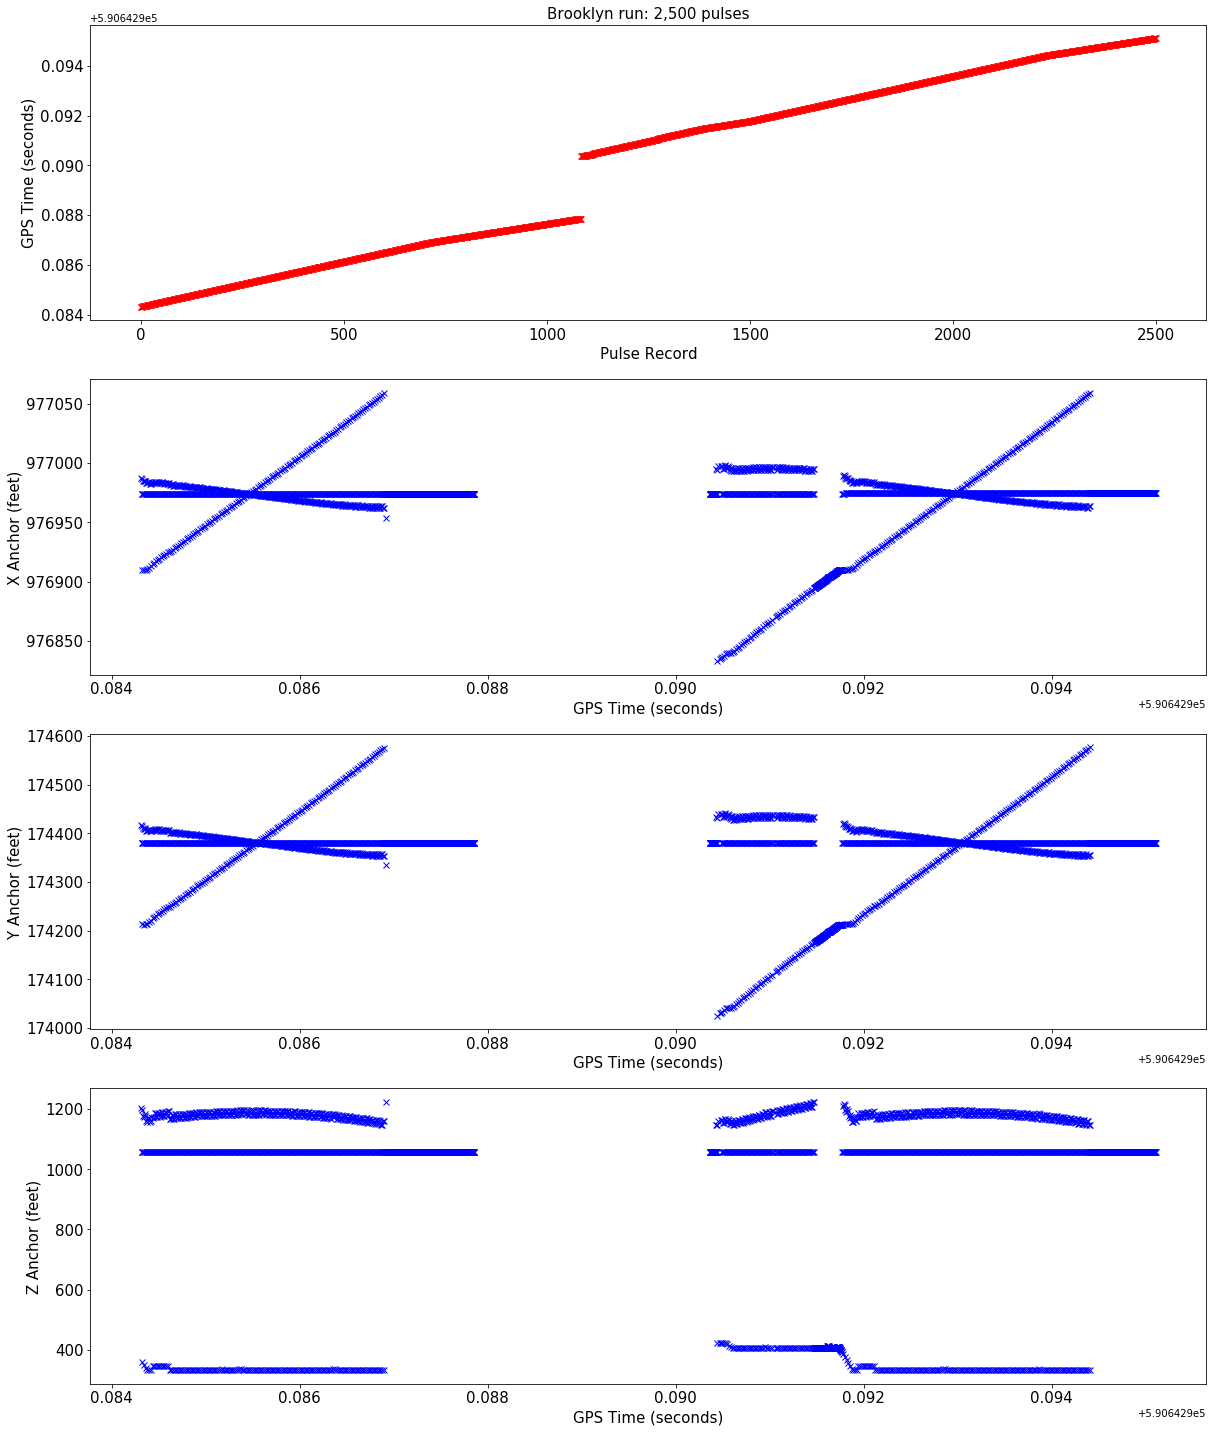

In [6]:
first_pulse = 1000600
last_pulse =  first_pulse + 2500

#anchors_plot = anchor_df.iloc[range(0,len(anchor_df),1000)]
anchors_plot = anchor_df[first_pulse:last_pulse]

plt.figure(figsize=(20,25))
plt.subplot(4, 1, 1)
plt.plot(range(len(anchors_plot)),anchors_plot['gps_time'],'xr')
plt.ylabel("GPS Time (seconds)",fontsize=15)
plt.xlabel("Pulse Record",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Brooklyn run: {:,d} pulses".format(last_pulse-first_pulse),fontsize=15)
#plt.title("Brooklyn run: full run, sampled 1/1000 pulses".format(last_pulse-first_pulse),fontsize=15)

plt.subplot(4, 1, 2)
plt.plot(anchors_plot['gps_time'],anchors_plot['x'],'xb')
plt.ylabel("X Anchor (feet)",fontsize=15)
plt.xlabel("GPS Time (seconds)",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(4, 1, 3)
plt.plot(anchors_plot['gps_time'],anchors_plot['y'],'xb')
plt.ylabel("Y Anchor (feet)",fontsize=15)
plt.xlabel("GPS Time (seconds)",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(4, 1, 4)
plt.plot(anchors_plot['gps_time'],anchors_plot['z'],'xb')
plt.ylabel("Z Anchor (feet)",fontsize=15)
plt.xlabel("GPS Time (seconds)",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("full_run.png")

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


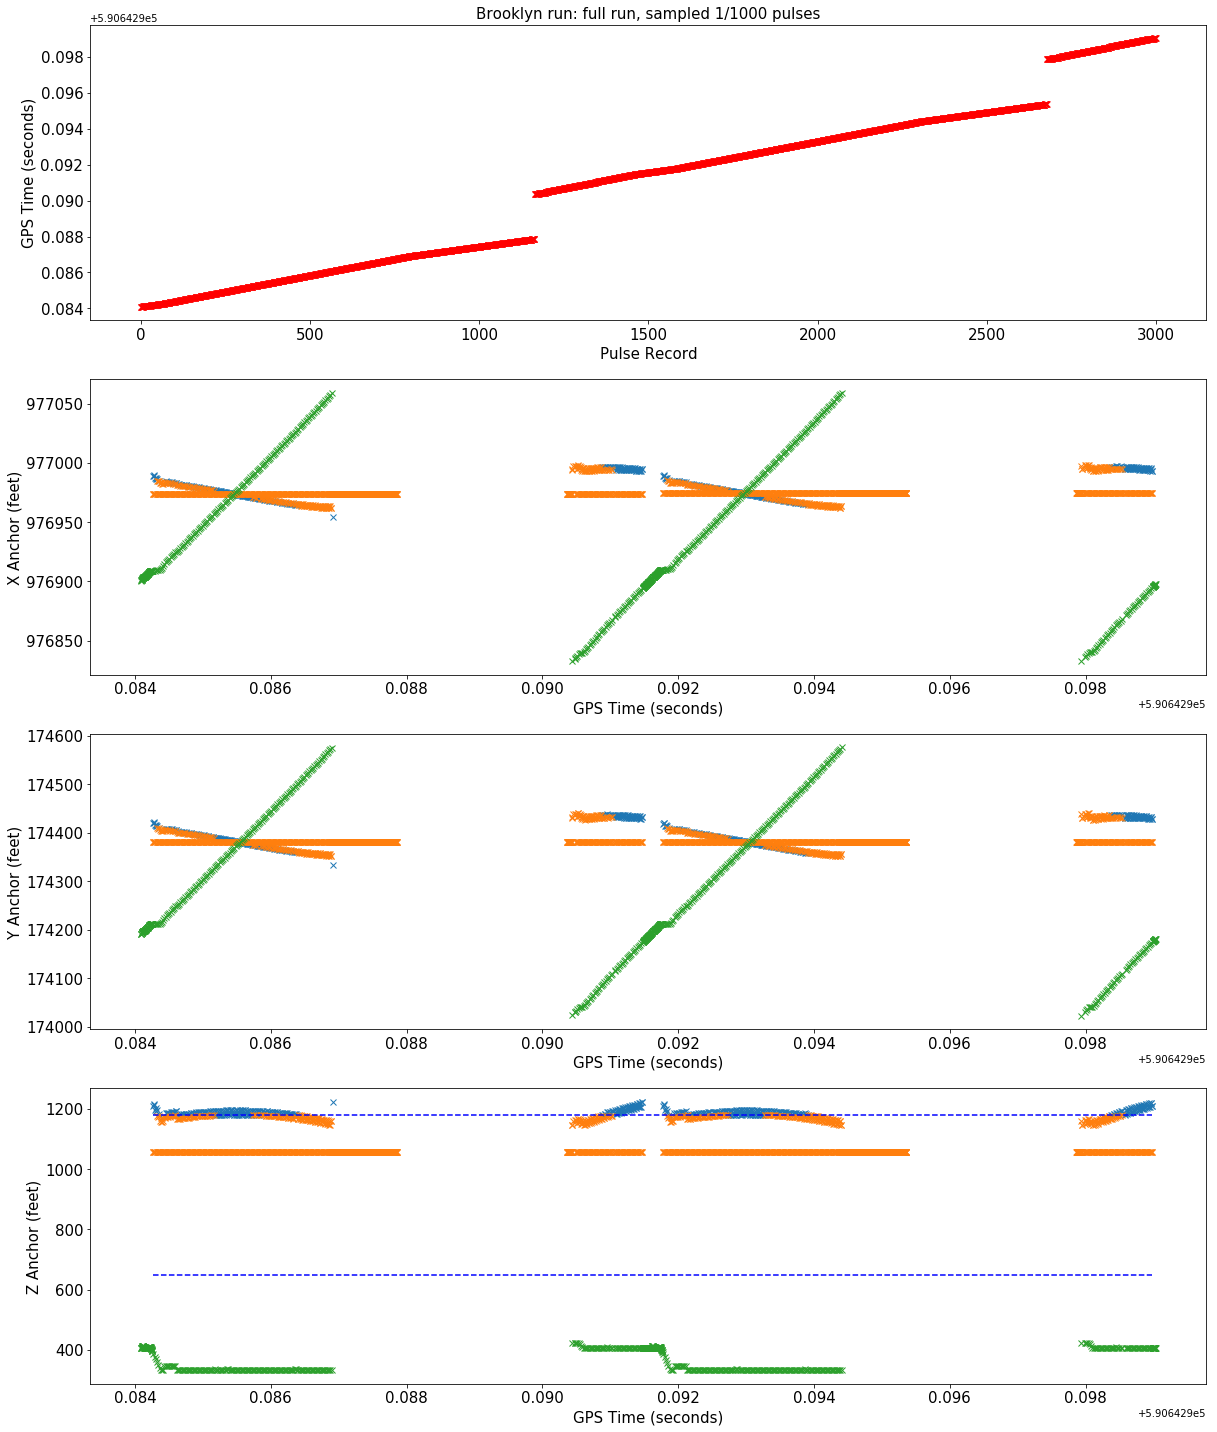

In [8]:
# Color Version of plots

first_pulse = 1000520
last_pulse =  first_pulse + 3000

#anchors_plot = anchor_df.iloc[range(0,len(anchor_df),5000)]
anchors_plot = anchor_df[first_pulse:last_pulse]

# Assign colors
high_threshold = 1180
low_threshold = 650
z_high = anchors_plot[anchor_df['z']>high_threshold]
z_low = anchors_plot[anchor_df['z']<low_threshold]
z_mid = anchors_plot[(anchor_df['z']<=high_threshold)&(anchor_df['z']>=low_threshold)]


plt.figure(figsize=(20,25))
plt.subplot(4, 1, 1)
plt.plot(range(len(anchors_plot)),anchors_plot['gps_time'],'xr')
plt.ylabel("GPS Time (seconds)",fontsize=15)
plt.xlabel("Pulse Record",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Brooklyn run: {:,d} pulses".format(last_pulse-first_pulse),fontsize=15)
plt.title("Brooklyn run: full run, sampled 1/1000 pulses".format(last_pulse-first_pulse),fontsize=15)

plt.subplot(4, 1, 2)
plt.plot(z_high['gps_time'],z_high['x'],'x')
plt.plot(z_mid['gps_time'],z_mid['x'],'x')
plt.plot(z_low['gps_time'],z_low['x'],'x')
plt.ylabel("X Anchor (feet)",fontsize=15)
plt.xlabel("GPS Time (seconds)",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(4, 1, 3)
plt.plot(z_high['gps_time'],z_high['y'],'x')
plt.plot(z_mid['gps_time'],z_mid['y'],'x')
plt.plot(z_low['gps_time'],z_low['y'],'x')
plt.ylabel("Y Anchor (feet)",fontsize=15)
plt.xlabel("GPS Time (seconds)",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(4, 1, 4)
plt.plot(z_high['gps_time'],z_high['z'],'x')
plt.plot(z_mid['gps_time'],z_mid['z'],'x')
plt.plot(z_low['gps_time'],z_low['z'],'x')
plt.plot(z_high['gps_time'],[high_threshold]*len(z_high),'b--')
plt.plot(z_high['gps_time'],[low_threshold]*len(z_high),'b--')
plt.ylabel("Z Anchor (feet)",fontsize=15)
plt.xlabel("GPS Time (seconds)",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("1k_color.png")

## Temporal Analysis

In [ ]:
# Assign colors
z_high = anchor_df[anchor_df['z']>high_threshold]
z_low = anchor_df[anchor_df['z']<low_threshold]
z_mid = anchor_df[(anchor_df['z']<=high_threshold)&(anchor_df['z']>=low_threshold)]

In [ ]:
# Bins are every 10 miliseconds.
ms_per_bin = 50
def create_bins(df,ms_per_bin,time_field='adj_gps_time'):
    '''Function returns a numpy array of bin edges, 
    where the number of bins = (max_time - min_time)*1e/ms_per_bin 
    where time is in seconds.'''
    min_val = int(np.floor(df[time_field].min())*1e3)
    max_val = int(np.ceil(df[time_field].max())*1e3)
    bin_range = range(min_val,max_val,ms_per_bin)
    bin_arr = np.array(bin_range)/1e3
    return bin_arr

In [ ]:
bin_arr = create_bins(anchor_df,ms_per_bin,'gps_time')
hist_total,_ = np.histogram(anchor_df['gps_time'],bin_arr)
hist_high,_ = np.histogram(z_high['gps_time'],bin_arr)
hist_mid,_ = np.histogram(z_mid['gps_time'],bin_arr)
hist_low,_ = np.histogram(z_low['gps_time'],bin_arr)

In [ ]:
plt.figure(figsize=(20,40))
plt.subplot(4, 1, 1)
plt.plot(bin_arr[:-1],hist_total,'+')
plt.xlabel("Seconds",fontsize=15)
plt.ylabel("Points per 10 miliseconds",fontsize=15)
plt.title("All anchor points",fontsize=15)

plt.subplot(4, 1, 2)
plt.plot(bin_arr[:-1],hist_mid,'+')
plt.xlabel("Seconds",fontsize=15)
plt.ylabel("Points per 10 miliseconds",fontsize=15)
plt.title("De-Noised anchor points",fontsize=15)

plt.subplot(4, 1, 3)
plt.plot(bin_arr[:-1],hist_high,'+')
plt.xlabel("Seconds",fontsize=15)
plt.ylabel("Points per 10 miliseconds",fontsize=15)
plt.title("Anchor points with Z > 1180 feet",fontsize=15)

plt.subplot(4, 1, 4)
plt.plot(bin_arr[:-1],hist_low,'+')
plt.xlabel("Seconds",fontsize=15)
plt.ylabel("Points per 10 miliseconds",fontsize=15)
plt.title("Anchor points with Z < 650 feet",fontsize=15)

In [ ]:
plt.figure(figsize=(20,17))

plt.plot(bin_arr[:-1],hist_total,'g+',label="All pulses")
plt.plot(bin_arr[:-1],hist_mid,'+',label="De-Noised")
plt.plot(bin_arr[:-1],hist_high,'+',label="High noise")
plt.plot(bin_arr[:-1],hist_low,'+',label="Low noise")

plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Seconds",fontsize=15)
plt.ylabel("Pulses per 50 miliseconds",fontsize=15)
plt.title("Temporal distribution of pulses from one flight",fontsize=18)

In [ ]:
# Calculate the percentage of points that are outliers based on anchor point z-values.
print("anchors shape: ",anchor_df.shape)
less = sum(anchor_df['z']<600)
more = sum(anchor_df['z']>600)
waymore = sum(anchor_df['z']>1200)
print(less)
print(more)
print(waymore)
print(less+more)
print("Percent below 600: {:2.2%}".format(less/(less+more)))
print("Percent above 1200: {:2.2%}".format(waymore/(less+more)))
print("Percent outlier: {:2.2%}".format((less+waymore)/(less+more)))

In [ ]:
# Outlier
pulsewave.get_pulse(8777438).print_table()

In [ ]:
# Outlier
pulsewave.get_pulse(2777439).print_table()

In [ ]:
pulsewave.get_pulse(8777440).print_table()

## Comparing with LAS file
GPS timestamps kind of line up...the overall timeframe is identical to ~5 digits, but the offset is very different and the points don't line up exactly.  Also the point counts don't align, even accounting for pulses with multiple returns in the .las file.

In [ ]:
las_df = pd.read_pickle("../../Data/pickles/200348_points.pkl")

In [ ]:
print("Num points: ",las_df.shape[0])
print("High: ",sum(las_df['z_scaled']>200))
print("Low: ",sum(las_df['z_scaled']<-200))

In [ ]:
las_min = las_df['gps_time'].min()
anchor_min = anchor_df['gps_time'].min()

In [ ]:
las_df['gps_time_adj'] = las_df['gps_time']-las_min
anchor_df['gps_time_adj'] = anchor_df['gps_time']-anchor_min

In [ ]:
# Noise points from anchor
noise_gps_times = anchor_df[anchor_df['z']<600]['gps_time_adj']
for time in noise_gps_times[:10000]:
    if time in las_df['gps_time_adj']:
        print("Yes!")

In [ ]:
noise_gps_times[1000:1010]

In [ ]:
las_df[las_df['gps_time_adj']>.37391][:10]

In [ ]:
las_df.iloc[1390:1408]

In [ ]:
plt.figure(figsize=(20,30))
plt.subplot(4, 1, 1)
plt.plot(las_df['x_scaled'][1390:1408])

plt.subplot(4, 1, 2)
plt.plot(las_df['y_scaled'][1390:1408])

plt.subplot(4, 1, 3)
plt.plot(las_df['z_scaled'][1390:1408])

plt.subplot(4, 1, 4)
plt.plot(las_df['intensity'][1390:1408])

### Wave plotting

In [ ]:
wave = pulsewave.get_waves(5)
len(wave)

In [ ]:
wave.smooth(7,3)
wave.plot()

In [ ]:
wave = pulsewave.get_waves(50)
type(wave)

In [ ]:
# pulse = pulsewave.get_pulse(10000)
# pulse.x_target

In [ ]:
# for key in pulsewave.vlrs[34735].record.key_entry_dict.keys():
#     print(pulsewave.vlrs[34735].record.key_entry_dict[key])

In [ ]:
# for key in pulsewave.vlrs[34735].record.key_entry_dict:
#     tiff_tag = pulsewave.vlrs[34735].record.key_entry_dict[key].tiff_tag_location
#     if tiff_tag == 34736:
#         offset_6 = pulsewave.vlrs[34735].record.key_entry_dict[key].value_offset
#         value_6 = pulsewave.vlrs[34736].record[offset_6]
#         pulsewave.vlrs[34735].record.key_entry_dict[key].value = value_6
#     elif tiff_tag == 34737:
#         offset_7 = pulsewave.vlrs[34735].record.key_entry_dict[key].value_offset
#         len_7 = pulsewave.vlrs[34735].record.key_entry_dict[key].count
#         value_7 = pulsewave.vlrs[34737].record[offset_7:(offset_7+len_7)]
#         pulsewave.vlrs[34735].record.key_entry_dict[key].value = value_7
#     else:
#         pulsewave.vlrs[34735].record.key_entry_dict[key].value = pulsewave.vlrs[34735].record.key_entry_dict[key].value_offset

In [ ]:
# for key in pulsewave.vlrs[34735].record.key_entry_dict:
#     print(pulsewave.vlrs[34735].record.key_entry_dict[key].value)

In [ ]:
header_attrs = ['filename',
'file_sig',
'global_params',
'file_id',
'proj_GUID1',
'proj_GUID2',
'proj_GUID3',
'proj_GUID3',
'sys_id',
'software',
'file_day',
'file_year',
'version_maj',
'version_min',
'header_size',
'offset_to_pulses',
'num_pulses',
'pulse_format',
'pulse_attr',
'pulse_size',
'pulse_compression',
'reserved',
'num_vlr',
'num_avlr',
't_scale',
't_offset',
't_min',
't_max',
'x_scale',
'y_scale',
'z_scale',
'x_offset',
'y_offset',
'z_offset',
'x_min',
'x_max',
'y_min',
'y_max',
'z_min',
'z_max',]

def print_pulsewaves_header(pulsewave,header_attrs):
    '''prints all the header attribtes of a PulseWaves class.'''
    for attr in header_attrs:
        print(attr,": ",getattr(pulsewave,attr))

In [ ]:
print_header(pulsewave,header_attrs)

In [ ]:
pulse_record_attrs = ['gps_timestamp', 
'offset_to_waves', 
'x_anchor', 
'y_anchor', 
'z_anchor', 
'x_target', 
'y_target', 
'z_target', 
'first_return', 
'last_return', 
'pulse_number', 
'pulse_descriptor', 
'reserved', 
'edge', 
'scan_direction', 
'facet', 
'intensity', 
'classification', 
'dx', 
'dy', 
'dz']
pulse = pulsewave.get_pulse(123)

In [ ]:
for attr in pulse_record_attrs:
    print(attr,": ",getattr(pulse,attr))

In [ ]:
pulse = pulsewave.get_pulse(123)

In [ ]:
pulse.print_table()